In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing values

## Age

Imputation with median.

In [5]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

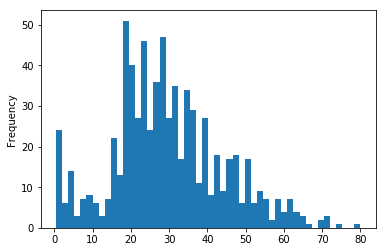

In [6]:
df.Age.plot.hist(bins=50)

In [7]:
imputer = Imputer(strategy='median', copy=False, )

In [8]:
imputer.fit(df.loc[:, ['Age']])

Imputer(axis=0, copy=False, missing_values='NaN', strategy='median',
    verbose=0)

In [9]:
df.Age = imputer.transform(df.loc[:, ['Age']])

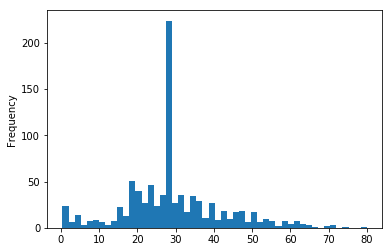

In [10]:
df.Age.plot.hist(bins=50)

## Cabin

In [11]:
df.Cabin.fillna('unknown', inplace=True)

## Embarked

In [12]:
df.loc[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Use most common value

In [14]:
df.Embarked.fillna('S', inplace=True)

## Passenger id as index

In [15]:
df.index = df.PassengerId

Drop the PassengerId column as it is the new index

In [16]:
df.drop('PassengerId', axis=1, inplace=True)

# Categoricals

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


## Class

In [18]:
hot_encode_class = pd.get_dummies(df.Pclass, prefix='class', drop_first=True)
hot_encode_class.head()

,class_2,class_3
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,0
5,0,1


In [19]:
df = df.join(hot_encode_class)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_2,class_3
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,0,1


drop Pclass column

In [20]:
df.drop('Pclass', axis=1, inplace=True)

In [21]:
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_2,class_3
PassengerId,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,0,1


## Sex

Hot encode sex variable

In [25]:
hot_encode_sex = pd.get_dummies(df.Sex, drop_first=True)

In [26]:
hot_encode_sex.head()

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [27]:
df = (df.join(hot_encode_sex)
      .drop('Sex', axis=1))
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_2,class_3,male
PassengerId,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,unknown,S,0,1,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,0,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,unknown,S,0,1,1


## Embarked

In [35]:
hot_encode_embarked = pd.get_dummies(df.Embarked, drop_first=True)

In [37]:
hot_encode_embarked.head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [38]:
df = (df.join(hot_encode_embarked)
         .drop('Embarked', axis=1))
df.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,class_2,class_3,male,Q,S
PassengerId,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,unknown,0,1,1,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,unknown,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,unknown,0,1,1,0,1


## Cabin

In [41]:
hot_encode_cabin = pd.get_dummies(df.Cabin, drop_first=True)

In [42]:
hot_encode_cabin.head()

,A14,A16,A19,A20,A23,A24,A26,A31,A32,A34,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,unknown
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Ticket

In [46]:
df.loc[df.Ticket == '371110']

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,class_2,class_3,male,Q,S
PassengerId,,,,,,,,,,,,,
110,1,"Moran, Miss. Bertha",28.0,1,0,371110,24.15,unknown,0,1,0,1,0
518,0,"Ryan, Mr. Patrick",28.0,0,0,371110,24.15,unknown,0,1,1,1,0
769,0,"Moran, Mr. Daniel J",28.0,1,0,371110,24.15,unknown,0,1,1,1,0


In [43]:
df.Ticket.value_counts()

347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
347088              6
382652              5
S.O.C. 14879        5
2666                4
W./C. 6608          4
17421               4
PC 17757            4
113781              4
113760              4
4133                4
LINE                4
347077              4
19950               4
349909              4
F.C.C. 13529        3
PC 17572            3
345773              3
371110              3
230080              3
PC 17755            3
347742              3
24160               3
110413              3
PC 17760            3
29106               3
                   ..
SOTON/OQ 392086     1
13567               1
386525              1
11771               1
SOTON/OQ 3101317    1
31418               1
4134                1
2700                1
CA. 2314            1
370370              1
349223              1
PC 17597            1
324669              1
34218               1
237442    